In [1]:
import numpy as np

import matplotlib.pyplot as plt

Dataset $(x_k,y_k)$ generation

In [2]:
np.random.seed(10)
# 마찬가지로 난수를 예측 가능하도록 만들어주는 역할

x = np.linspace(0, 4, 100)
# 0에서 4까지 100개의 균등한 점 생성
y = 3*np.sin(2*x) + np.random.normal(0, 0.2, size=x.shape)
# 정규 분포 노이즈를 추가하여 데이터 생성

In [3]:
print(x[:5])
print(y[:5])
# x와 y의 첫 5개 값을 출력하여 확인

[0.         0.04040404 0.08080808 0.12121212 0.16161616]
[0.2663173  0.38521629 0.17366049 0.71849328 1.07716664]


Curve fit with linear function $f(x;\beta)=\beta_1*\sin(\beta_2*\pi*x)$

Define $E_2 = \sum_{k=1}^{10}(y_k-f(x_k;\beta))^2$

Solving $A\beta=y$ is impossible...

Instead, let's consider $\partial_{\beta_i}E_2$ to utilize gradient descent:

$\beta_i^{n+1}=\beta_i^{n+1}-\delta\partial_{\beta_i}E_2(\beta^{n})$

In [4]:
beta = np.array([1,1]) #initialize; beta^{1}
# [1,1] 초기값 설정
beta_list = [beta]
# 최적화 과정에서의 𝛽값 리스트로 저장

delta = 1e-3
# 학습률(gradient descent의 step size)

In [5]:
print(beta)

[1 1]


Note that
$\partial_{i}E_2 = \frac{1}{n_{sample}} 2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\partial_{i}f(x_k;\beta))$
hence,

$\partial_{1}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\sin(\beta_2*x_k))$

$\partial_{2}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\beta_1\cos(\beta_2*x_k)*x_k)$

In [6]:
def grad_E2(x,y,beta):
  # E_2 함수에 대한 그래디언트(기울기) 계산하는 함수
    grad_E2 = np.zeros(2)
    # 기울기를 저장할 배열 초기화

    if False: # "Mini-Batch" Gradient Descent if "True"
      # 미니배치 경사 하강법을 활성화할 경우 일부 데이터만 선택하여 학습 가능
      idx = np.random.randint(low=0, high=len(x), size= 10)
      x_data = x[idx]
      y_data = y[idx]
    else:    # Classical Gradient Descent if "False"
      # 현재는 전체 데이터를 사용 (클래식 경사 하강법)
      x_data = x
      y_data = y
    common_term = y_data-beta[0]*np.sin(beta[1]*x_data)
    # 모델의 예측값과 실제값 차이 계산
    grad_E2[0] = 2*np.mean(common_term*(-np.sin(beta[1]*x_data)))
    grad_E2[1] = 2*np.mean(common_term*(-beta[0]*np.cos(beta[1]*x_data)*x_data))
    # β0 와 𝛽1에 대한 편미분을 각각 계산
    return grad_E2
  # 계산된 그래디언트를 반환

In [7]:
for k in range(10000):
  beta = beta - delta*grad_E2(x,y,beta)
  # 10,000번의 반복을 수행하며, 기울기 정보를 이용해 β를 업데이트

  if k %100 == 0:
    print(k,"\t",*np.round(beta,3))
    beta_list.append(list(beta))
    # 100번마다 현재 β 값을 출력하고 beta_list에 저장


0 	 0.999 1.0
100 	 0.875 1.039
200 	 0.764 1.114
300 	 0.679 1.275
400 	 0.684 1.59
500 	 0.85 1.89
600 	 1.055 1.999
700 	 1.243 2.021
800 	 1.412 2.022
900 	 1.565 2.021
1000 	 1.703 2.019
1100 	 1.828 2.017
1200 	 1.94 2.015
1300 	 2.042 2.014
1400 	 2.134 2.013
1500 	 2.217 2.011
1600 	 2.292 2.01
1700 	 2.359 2.009
1800 	 2.42 2.008
1900 	 2.476 2.007
2000 	 2.526 2.007
2100 	 2.571 2.006
2200 	 2.612 2.005
2300 	 2.648 2.005
2400 	 2.682 2.004
2500 	 2.712 2.004
2600 	 2.739 2.003
2700 	 2.764 2.003
2800 	 2.786 2.003
2900 	 2.806 2.002
3000 	 2.824 2.002
3100 	 2.841 2.002
3200 	 2.855 2.002
3300 	 2.869 2.001
3400 	 2.881 2.001
3500 	 2.892 2.001
3600 	 2.902 2.001
3700 	 2.911 2.001
3800 	 2.919 2.001
3900 	 2.926 2.0
4000 	 2.933 2.0
4100 	 2.939 2.0
4200 	 2.944 2.0
4300 	 2.949 2.0
4400 	 2.954 2.0
4500 	 2.958 2.0
4600 	 2.961 2.0
4700 	 2.965 2.0
4800 	 2.968 2.0
4900 	 2.97 2.0
5000 	 2.973 2.0
5100 	 2.975 2.0
5200 	 2.977 2.0
5300 	 2.979 2.0
5400 	 2.98 2.0
5500 	 2.

In [8]:
def E2Loss(x,y,beta):
  return np.sqrt(np.sum((y-beta[0]*np.sin(beta[1]*x))**2))
# 손실 함수 E2를 정의
# 예측값과 실제값의 차이를 제곱하고, 합한 뒤 루트를 취함

In [9]:
beta0_range = np.linspace(-1, 4, 100)
beta1_range = np.linspace(-1, 4, 100)
# β0,β1의 범위를 -1에서 4까지 100개로 설정

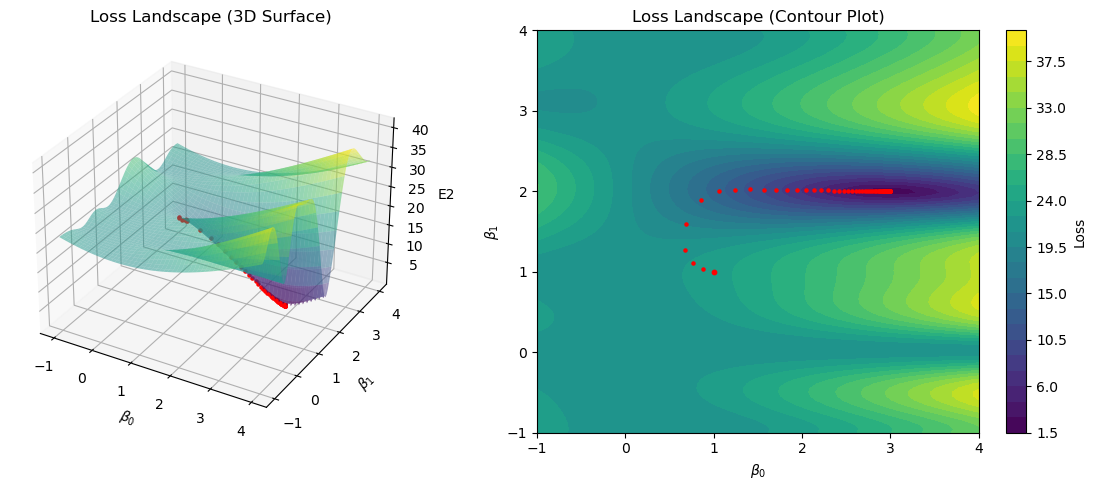

In [10]:
loss_values = np.zeros((len(beta0_range), len(beta1_range)))
# 손실 값을 저장할 행렬 초기화

for i, beta0 in enumerate(beta0_range):
    for j, beta1 in enumerate(beta1_range):
        loss_values[i, j] = E2Loss(x, y, [beta0, beta1])
# 모든 𝛽0, 𝛽1 조합에 대해 손실 함수 값 계산

B0, B1 = np.meshgrid(beta0_range, beta1_range)
# β0,β1의 그리드(meshgrid) 생성 (3D 그래프용)

# --- 3D Surface Plot ---
fig = plt.figure(figsize=(12, 5))
# 3D 플롯 생성

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(1, 1, E2Loss(x,y,[1,1]), color='red', s=10)
# 초기 β=(1,1)의 손실값을 빨간 점으로 표시

for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax1.scatter(a_fit, b_fit, E2Loss(x,y,[a_fit,b_fit]), color='red', s=5)
# 경사 하강법 과정에서 β의 변화를 빨간 점으로 시각화

ax1.plot_surface(B0, B1, loss_values.T, cmap='viridis', edgecolor='none', alpha=0.5)
# 손실 함수의 3D 표면 플롯

ax1.set_xlabel(r'$\beta_0$')
ax1.set_ylabel(r'$\beta_1$')
ax1.set_zlabel('E2')
ax1.set_title('Loss Landscape (3D Surface)')
# 축 라벨과 제목 설정

# --- Contour Plot ---
ax2 = fig.add_subplot(122)
contour = ax2.contourf(B0, B1, loss_values.T, levels=30, cmap='viridis')
# 손실 함수를 등고선으로 표현
fig.colorbar(contour, ax=ax2, label="Loss")
# 색상 막대 추가
ax2.scatter(1, 1, color='red', s=10)
for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax2.scatter(a_fit, b_fit, color='red', s=5)
  # 초기값과 학습 과정에서의 β 변화 표시
  
ax2.set_xlabel(r'$\beta_0$')
ax2.set_ylabel(r'$\beta_1$')
ax2.set_title('Loss Landscape (Contour Plot)')
# 등고선 그래프 설정

plt.tight_layout()
plt.show()
# 그래프 정렬 후 표시

# 결론적으로 grad_E2를 이용해 경사 하강법으로 β를 최적화
# 3D 및 등고선 그래프를 통해 손실 함수의 변화 및 최적화 경로 시각화